In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
#we will load the iris data from scikit-learn package
from sklearn.datasets import load_iris
iris = load_iris()
#check the shape of iris data
print(iris.data.shape)
A = iris.data
#check the shape of iris target
print(iris.target.shape)

#How many labels does iris data have?
C = len(np.unique(iris.target))
print(np.unique(iris.target))
print(C)
n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points

#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],])
for i in range(iris.target.shape[0]):
  if iris.target[i] != 1: # Convert class labels that are not 1 into -1
    y[i] = -1

#Create an index array
indexarr = np.arange(n) #index array
np.random.seed(10)
np.random.shuffle(indexarr) #shuffle the indices

print(indexarr) #check indexarr after shuffling
#Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_data = iris.data[indexarr[:int(0.8*150)]]
train_label = y[indexarr[:int(0.8*150)]]
test_data = iris.data[indexarr[int(0.8*150):]]
test_label = y[indexarr[int(0.8*150):]]

(150, 4)
(150,)
[0 1 2]
3
[ 87 111  10  91  49  60  72  67  39  55  66 142  53   1  19 112  85  38
  21  35 102 132 126  24  61   2  95  90  76 117  58  97 129 114 146  47
 124 120 118 141  26  43  59  41  56  32  52  70 121 144  68 109  81  78
  51  14  48  63  20 137  29   3 106  98 140  37 139  45  82  83  42 143
 131 116 105 133   6  79 108  99  34 128  50  96   4   5  44  84 130 103
  75   7  46  17 104 101  71  80 110 147 149 134  74  28  11  94  23  22
 127  93  18  27  36  57  31  65  12  89 119  30  86  92 148  25 138  13
  69  77 135 136  33  62 122 107  88  54 100  16 115  40   0  73   8 145
 123 113  64  15 125   9]


In [3]:
def predict(w,x):
  return np.sign(np.dot(w,x))

In [4]:
def compute_accuracy(data,labels,model_w):
  count = 0
  for i in range(data.shape[0]):
    z = predict(model_w,data[i])
    y = labels[i]
    if z==y:
      count = count+1

  return 100*(count/data.shape[0])

**Q 1**

The appropriate choice of $f_i(w)$ is:
$$ \large{f_i(w) = \frac{\lambda}{2n} \sum_{j=1}^{d}w_j^2 + \frac{1}{n} L(y_i,w^Tx_i)} $$ \\
 
where, $d$ = Total Number of features in the data set.



In [5]:
def compute_loss_h(w,x,y):
  return max(0, 1-y*np.dot(w,x))

In [6]:
def compute_objfnval(data,labels,model_w,lamda):
  fun_value = 0
  a = 0.5*lamda*((np.linalg.norm(model_w))**2)
  n = len(labels)
  for data_pt, label in zip(data, labels):
    b = compute_loss_h(model_w, data_pt, label)
    fun_value = fun_value + b

  return a + (fun_value/n)

In [7]:
def compute_grad_loss_h(x,y,model_w,lamda):
  n = model_w.shape[0]
  grad = np.zeros(n)
  for i in range(n):
    condition = 1 - y*np.dot(model_w, x)
    if condition < 0:
      grad = (lamda/n)*model_w
    else:
      grad = np.subtract((lamda/n)*model_w, (1/n)*(y*x))
    
  return grad

In [8]:
def compute_grad_loss_h(x,y,model_w,lamda):
  n = model_w.shape[0]
  condition = 1 - y*np.dot(model_w, x)
  if condition < 0:
    grad = lamda*model_w
  else:
    grad = np.subtract(lamda*model_w, y*x)
    
  return np.multiply(1/n,grad)

In [9]:
def OPT1(data, label, lamda, num_epochs):
  t = 1.0
  obj_values = []
  train_accuracy = []
  test_accuracy = []
  #initialize w
  w = np.random.randn(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w = np.subtract(w, np.multiply(step, compute_grad_loss_h(data[i],label[i],w,lamda)))
      t = t+1
      if t>1e4:
        t = 1
    obj_values.append(compute_objfnval(data,label,w,lamda))
    train_accuracy.append(compute_accuracy(data,label,w))
    global test_data
    global test_label
    test_accuracy.append(compute_accuracy(test_data,test_label,w))
  return w,obj_values,train_accuracy,test_accuracy

In [10]:
lamda_list = [1e-3,1e-2,0.1,1.0,10.0]
num_epochs = 1000

**Q 6 (a), (b) and (c)**

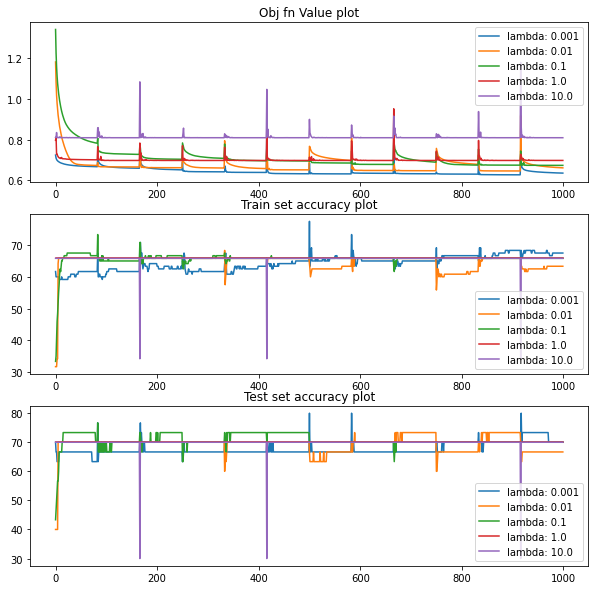

In [11]:
final_train_acc = []
final_test_acc = []

fig, axs = plt.subplots(3, figsize=(10,10))
for l in lamda_list:
  w, fn, train_acc, test_acc = OPT1(train_data, train_label, l, num_epochs)
  axs[0].plot(list(range(num_epochs)),fn,label = 'lambda: '+str(l))
  axs[1].plot(list(range(num_epochs)),train_acc,label = 'lambda: '+str(l))
  axs[2].plot(list(range(num_epochs)),test_acc,label = 'lambda: '+str(l))
  final_train_acc.append(compute_accuracy(train_data,train_label,w))
  final_test_acc.append(compute_accuracy(test_data,test_label,w))
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_title('Obj fn Value plot')
axs[1].set_title('Train set accuracy plot')
axs[2].set_title('Test set accuracy plot')
fig.show()

**Q 6 (d)**

In [12]:
table = []
for i in range(len(lamda_list)):
  table.append( [ lamda_list[i], final_train_acc[i], final_test_acc[i] ] )
print(tabulate(table, headers=["Lambda", "Final Train Set Accuracy", "Final test Set Accuracy"]))

  Lambda    Final Train Set Accuracy    Final test Set Accuracy
--------  --------------------------  -------------------------
   0.001                     67.5                       70
   0.01                      63.3333                    66.6667
   0.1                       65.8333                    70
   1                         65.8333                    70
  10                         65.8333                    70


**Q 6 (e)**

We are getting highest test set accuracy for smallest lambda. As we have shuffled the array so we are getting a sudden increase in objective fn value and sudden decrease in accuracies at some epochs.

**Q 7**

We now update our stopping criteria as folllowing,

$||w_{i+1}- w_{i}||>\frac{1}{10^5}$
i.e we will stop the update process when gradient of difference of two successive w will be less than 1e-5

In [13]:
def OPT1_new(data, label, lamda):
  t = 1.0
  obj_values = []
  train_accuracy = []
  test_accuracy = []
  iters = 0
  #initialize w
  w = np.random.randn(data.shape[1])
  w_old = w
  arr = np.arange(data.shape[0])
  np.random.shuffle(arr) #shuffle every epoch
  for i in np.nditer(arr): #Pass through the data points
    step = 1/t
    # Update w using w <- w - step * g_i (w)
    w = np.subtract(w, np.multiply(step, compute_grad_loss_h(data[i],label[i],w,lamda)))
    t = t+1
    if t>1e4:
      t = 1
  while (np.linalg.norm(np.subtract(w, w_old))) > 1e-4:
    w_old = w
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w = np.subtract(w, np.multiply(step, compute_grad_loss_h(data[i],label[i],w,lamda)))
      t = t+1
      if t>1e4:
        t = 1
    iters = iters+1
    obj_values.append(compute_objfnval(data,label,w,lamda))
    train_accuracy.append(compute_accuracy(data,label,w))
    global test_data
    global test_label
    test_accuracy.append(compute_accuracy(test_data, test_label,w))
  return w_old,obj_values,train_accuracy,test_accuracy,iters

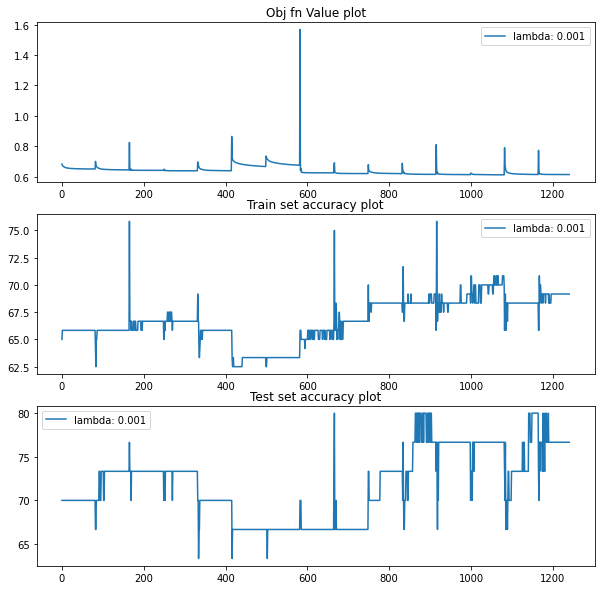

In [14]:
fig, axs = plt.subplots(3, figsize=(10,10))

w, fn, train_acc,test_acc, iters = OPT1_new(train_data, train_label, 0.001)
axs[0].plot(list(range(iters)),fn,label = 'lambda: '+str(0.001))
axs[1].plot(list(range(iters)),train_acc,label = 'lambda: '+str(0.001))
axs[2].plot(list(range(iters)),test_acc,label = 'lambda: '+str(0.001))
final_train_acc2 = compute_accuracy(train_data,train_label,w)
final_test_acc2 = compute_accuracy(test_data,test_label,w)
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_title('Obj fn Value plot')
axs[1].set_title('Train set accuracy plot')
axs[2].set_title('Test set accuracy plot')
fig.show()

In [15]:
table = []
table.append( [ 0.01, final_train_acc2, final_test_acc2 ] )
print(tabulate(table, headers=["Lambda", "Final Train Set Accuracy", "Final test Set Accuracy"]))

  Lambda    Final Train Set Accuracy    Final test Set Accuracy
--------  --------------------------  -------------------------
    0.01                     69.1667                    76.6667


**Q 8**

In [16]:
import math

In [17]:
def compute_loss_l(w,x,y):
  return np.log(1+np.exp(-y*np.dot(w,x)))

In [18]:
def compute_objfnval2(data,labels,model_w,lamda):
  fun_value = 0
  a = 0.5*lamda*((np.linalg.norm(model_w))**2)
  n = len(labels)
  for data_pt, label in zip(data, labels):
    b = compute_loss_l(model_w, data_pt, label)
    fun_value = fun_value + b

  return a + (fun_value/n)

In [19]:
def compute_grad_loss_l(x,y,model_w,lamda):
  n = model_w.shape[0]
  grad = (lamda/n)*model_w + (1/n)*(1/(1+np.exp(-y*np.dot(w,x)))*(-y*x))
    
  return grad

In [20]:
def compute_loss_sh(w,x,y):
  return (compute_loss_h(w,x,y))**2

In [29]:
def compute_loss_sh(w,x,y):
  return (max(0,1-y*np.dot(w,x)))**2

In [21]:
def compute_objfnval3(data,labels,model_w,lamda):
  fun_value = 0.0
  a = 0.5*lamda*((np.linalg.norm(model_w))**2)
  n = len(labels)
  for data_pt, label in zip(data, labels):
    b = compute_loss_sh(model_w, data_pt, label)
    fun_value = fun_value + b

  return a + (fun_value/n)

In [39]:
def compute_grad_loss_sh(x,y,model_w,lamda):

  return 2*compute_grad_loss_h(x,y,model_w,lamda)

In [23]:
def OPT1_new2(data, label, lamda):
  t = 1.0
  obj_values = []
  train_accuracy = []
  test_accuracy = []
  iters = 0
  #initialize w
  w = np.random.randn(data.shape[1])
  w_old = w
  arr = np.arange(data.shape[0])
  np.random.shuffle(arr) #shuffle every epoch
  for i in np.nditer(arr): #Pass through the data points
    step = 1/t
    # Update w using w <- w - step * g_i (w)
    w = np.subtract(w, np.multiply(step, compute_grad_loss_l(data[i],label[i],w,lamda)))
    t = t+1
    if t>1e4:
      t = 1
  while (np.linalg.norm(np.subtract(w, w_old))) > 1e-3:
    w_old = w
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(data[i],label[i],w,lamda)))
      t = t+1
      if t>1e4:
        t = 1
    iters = iters+1
    obj_values.append(compute_objfnval2(data,label,w,lamda))
    train_accuracy.append(compute_accuracy(data,label,w))
    global test_data
    global test_label
    test_accuracy.append(compute_accuracy(test_data, test_label,w))
  return w,obj_values,train_accuracy,test_accuracy,iters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


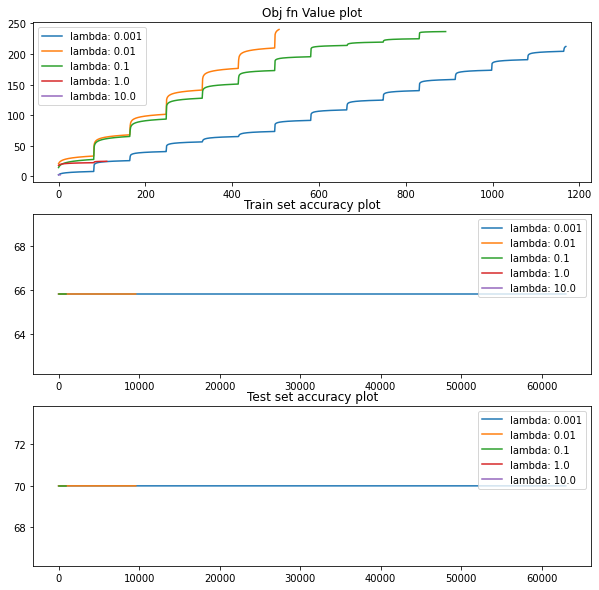

In [24]:
final_train_acc = []
final_test_acc = []

fig, axs = plt.subplots(3, figsize=(10,10))
for l in lamda_list:
  w, fn, train_acc, test_acc,iters = OPT1_new2(train_data, train_label, l)
  axs[0].plot(list(range(iters)),fn,label = 'lambda: '+str(l))
  axs[1].plot(list(range(iters)),train_acc,label = 'lambda: '+str(l))
  axs[2].plot(list(range(iters)),test_acc,label = 'lambda: '+str(l))
  final_train_acc.append(compute_accuracy(train_data,train_label,w))
  final_test_acc.append(compute_accuracy(test_data,test_label,w))
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_title('Obj fn Value plot')
axs[1].set_title('Train set accuracy plot')
axs[2].set_title('Test set accuracy plot')
fig.show()

In [25]:
table = []
for i in range(len(lamda_list)):
  table.append( [ lamda_list[i], final_train_acc[i], final_test_acc[i] ] )
print(tabulate(table, headers=["Lambda", "Final Train Set Accuracy", "Final test Set Accuracy"]))

  Lambda    Final Train Set Accuracy    Final test Set Accuracy
--------  --------------------------  -------------------------
   0.001                     65.8333                         70
   0.01                      65.8333                         70
   0.1                       65.8333                         70
   1                         65.8333                         70
  10                         65.8333                         70


In [33]:
def OPT1_new3(data, label, lamda):
  t = 1.0
  obj_values = []
  train_accuracy = []
  test_accuracy = []
  iters = 0
  #initialize w
  np.random.seed(10000)
  w = np.random.randn(data.shape[1])
  w_old = w
  #np.random.seed(35000)
  w_old = np.random.randn(data.shape[1])

  arr = np.arange(data.shape[0])
  #np.random.shuffle(arr) #shuffle every epoch
  #for i in np.nditer(arr): #Pass through the data points
  #  step = 1/t
  #  # Update w using w <- w - step * g_i (w)
  #  w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(data[i],label[i],w,lamda)))
  #  t = t+1
  #  if t>1e4:
  #    t = 1
  while (np.linalg.norm(np.subtract(w, w_old))) > 1e-3:
    w_old = w
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(data[i],label[i],w,lamda)))
      t = t+1
      #if t>1e4:
      #  t = 1
    iters = iters+1
    obj_values.append(compute_objfnval3(data,label,w,lamda))
    train_accuracy.append(compute_accuracy(data,label,w))
    global test_data
    global test_label
    test_accuracy.append(compute_accuracy(test_data, test_label,w))
  return w,obj_values,train_accuracy,test_accuracy,iters

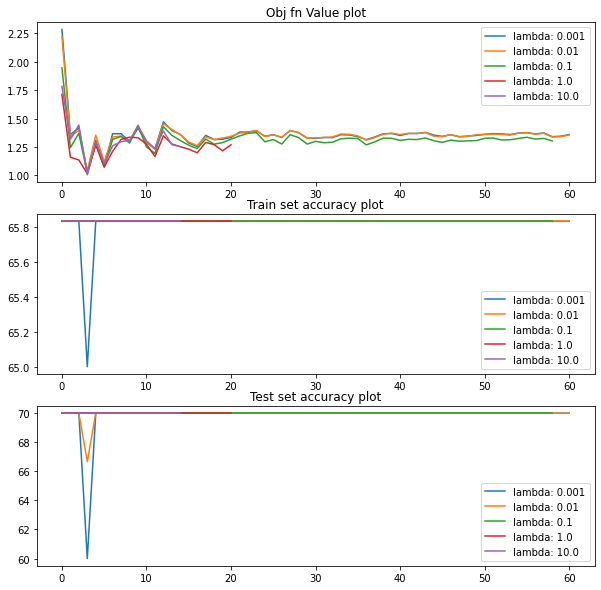

In [40]:
final_train_acc = []
final_test_acc = []

fig, axs = plt.subplots(3, figsize=(10,10))
for l in lamda_list:
  w, fn, train_acc, test_acc,iters = OPT1_new3(train_data, train_label, l)
  axs[0].plot(list(range(iters-1)),fn[:-1],label = 'lambda: '+str(l))
  axs[1].plot(list(range(iters-1)),train_acc[:-1],label = 'lambda: '+str(l))
  axs[2].plot(list(range(iters-1)),test_acc[:-1],label = 'lambda: '+str(l))
  final_train_acc.append(compute_accuracy(train_data,train_label,w))
  final_test_acc.append(compute_accuracy(test_data,test_label,w))
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_title('Obj fn Value plot')
axs[1].set_title('Train set accuracy plot')
axs[2].set_title('Test set accuracy plot')
fig.show()

In [41]:
table = []
for i in range(len(lamda_list)):
  table.append( [ lamda_list[i], final_train_acc[i], final_test_acc[i] ] )
print(tabulate(table, headers=["Lambda", "Final Train Set Accuracy", "Final test Set Accuracy"]))

  Lambda    Final Train Set Accuracy    Final test Set Accuracy
--------  --------------------------  -------------------------
   0.001                     65.8333                         70
   0.01                      65.8333                         70
   0.1                       65.8333                         70
   1                         65.8333                         70
  10                         65.8333                         70


Here, we are getting same results for all lambdas.